In [ ]:
#Cheking GPU
!nvidia-smi

Sat Mar 26 12:59:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Downloading file from github
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-03-26 12:59:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   232MB/s    in 0.7s    

2022-03-26 12:59:21 (232 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
#Unziping file
with zipfile.ZipFile('/content/10_food_classes_10_percent.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
zip_ref.close()

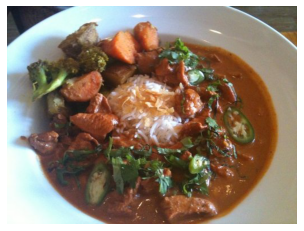

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/10_food_classes_10_percent/test/chicken_curry/101833.jpg')
imgplot = plt.imshow(img)
plt.axis(False);

In [ ]:
#walking through all the directories
import os
for (dirpath, dirnames, filenames) in os.walk('/content/10_food_classes_10_percent'):
    print(f'There are {len(dirpath)} directories and {len(filenames)} images in {dirpath}')
        

There are 35 directories and 0 images in /content/10_food_classes_10_percent
There are 40 directories and 0 images in /content/10_food_classes_10_percent/test
There are 55 directories and 250 images in /content/10_food_classes_10_percent/test/grilled_salmon
There are 50 directories and 250 images in /content/10_food_classes_10_percent/test/ice_cream
There are 46 directories and 250 images in /content/10_food_classes_10_percent/test/ramen
There are 46 directories and 250 images in /content/10_food_classes_10_percent/test/pizza
There are 46 directories and 250 images in /content/10_food_classes_10_percent/test/steak
There are 46 directories and 250 images in /content/10_food_classes_10_percent/test/sushi
There are 51 directories and 250 images in /content/10_food_classes_10_percent/test/fried_rice
There are 50 directories and 250 images in /content/10_food_classes_10_percent/test/hamburger
There are 54 directories and 250 images in /content/10_food_classes_10_percent/test/chicken_curry
T

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

print("Training images")
train_data_10_percent = train_datagen.flow_from_directory(directory = train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          class_mode = 'categorical',
                                                          batch_size = BATCH_SIZE)
print('Test images')
test_data_10_percent = test_datagen.flow_from_directory(directory = test_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          class_mode = 'categorical',
                                                          batch_size = BATCH_SIZE)

Training images
Found 750 images belonging to 10 classes.
Test images
Found 2500 images belonging to 10 classes.


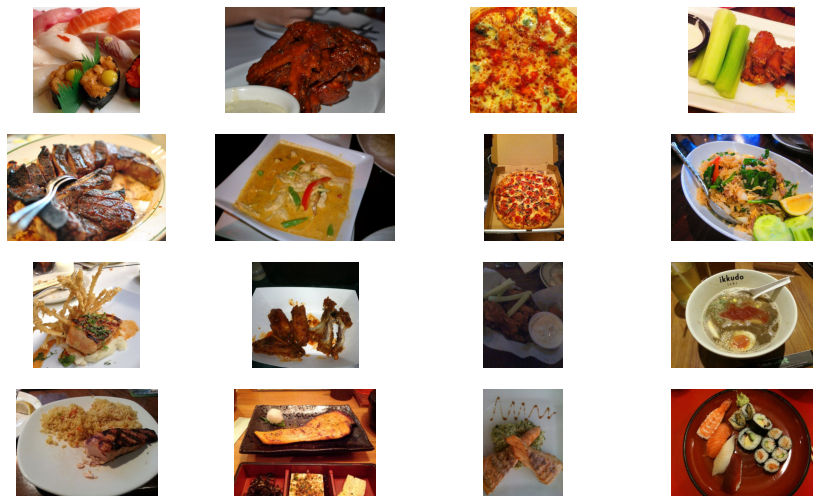

In [ ]:
import random
from PIL import Image 

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f'Saving Tensorboard files to {log_dir}')
  return tensorboard_callback

In [ ]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientrel_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'Feature_extraction_layer',
                                           input_shape = IMAGE_SHAPE + (3,))
  
  model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])
  
  return model

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
from gc import callbacks
resnet_history = resnet_model.fit(train_data_10_percent,
                 batch_size = BATCH_SIZE,
                 epochs = 8,
                 validation_data = test_data_10_percent,
                 steps_per_epoch = len(train_data_10_percent),
                 validation_steps = len(test_data_10_percent),
                 callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub',
                                                          experiment_name= 'resnet50V2')])

Saving Tensorboard files to tensorflow_hub/resnet50V2/20220326-125934
Epoch 1/8
24/24 [==============================] - 30s 736ms/step - loss: 1.8072 - accuracy: 0.4187 - val_loss: 1.1586 - val_accuracy: 0.6432
Epoch 2/8
24/24 [==============================] - 16s 698ms/step - loss: 0.8767 - accuracy: 0.7413 - val_loss: 0.8572 - val_accuracy: 0.7244
Epoch 3/8
24/24 [==============================] - 16s 663ms/step - loss: 0.6166 - accuracy: 0.8173 - val_loss: 0.7702 - val_accuracy: 0.7468
Epoch 4/8
24/24 [==============================] - 15s 662ms/step - loss: 0.4758 - accuracy: 0.8640 - val_loss: 0.7080 - val_accuracy: 0.7688
Epoch 5/8
24/24 [==============================] - 15s 660ms/step - loss: 0.3762 - accuracy: 0.9013 - val_loss: 0.6746 - val_accuracy: 0.7852
Epoch 6/8
24/24 [==============================] - 15s 657ms/step - loss: 0.3098 - accuracy: 0.9507 - val_loss: 0.6655 - val_accuracy: 0.7808
Epoch 7/8
24/24 [==============================] - 15s 661ms/step - loss: 0.26

In [ ]:
resnet_model.evaluate(test_data_10_percent)

79/79 [==============================] - 12s 152ms/step - loss: 0.6378 - accuracy: 0.7880


[0.637823224067688, 0.7879999876022339]

In [ ]:
import pandas as pd
import numpy as np
pd.DataFrame(resnet_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.807243,0.418667,1.158568,0.6432
1,0.876672,0.741333,0.857192,0.7244
2,0.616617,0.817333,0.770153,0.7468
3,0.475751,0.864000,0.707956,0.7688
4,0.376176,0.901333,0.674614,0.7852
5,0.309811,0.950667,0.665510,0.7808
6,0.261228,0.956000,0.642929,0.7908
7,0.220394,0.970667,0.637823,0.7880


In [ ]:
def plot_loss_curvers(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

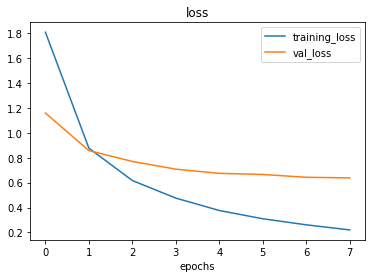

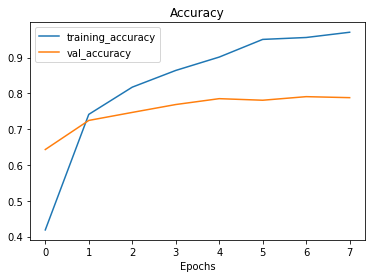

In [ ]:
plot_loss_curvers(resnet_history)

In [ ]:
efficientnet_model = create_model(
    model_url = efficientrel_url,
    num_classes = train_data_10_percent.num_classes
)

efficientnet_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


effecientnet_history = efficientnet_model.fit(
    train_data_10_percent,
    batch_size = 32,
    epochs = 8,
    validation_data = test_data_10_percent,
    steps_per_epoch = len(train_data_10_percent),
    validation_steps = len(test_data_10_percent),
    callbacks = [create_tensorboard_callback(
        dir_name = 'tensorflow_hub',
        experiment_name = 'Efficientnet model'
    )]
)

Saving Tensorboard files to tensorflow_hub/Efficientnet model/20220326-130229
Epoch 1/8
24/24 [==============================] - 25s 708ms/step - loss: 1.7957 - accuracy: 0.4733 - val_loss: 1.2508 - val_accuracy: 0.7588
Epoch 2/8
24/24 [==============================] - 15s 641ms/step - loss: 1.0135 - accuracy: 0.7973 - val_loss: 0.8335 - val_accuracy: 0.8340
Epoch 3/8
24/24 [==============================] - 15s 632ms/step - loss: 0.7267 - accuracy: 0.8560 - val_loss: 0.6702 - val_accuracy: 0.8496
Epoch 4/8
24/24 [==============================] - 15s 634ms/step - loss: 0.5837 - accuracy: 0.8800 - val_loss: 0.5913 - val_accuracy: 0.8608
Epoch 5/8
24/24 [==============================] - 15s 630ms/step - loss: 0.4974 - accuracy: 0.8973 - val_loss: 0.5401 - val_accuracy: 0.8664
Epoch 6/8
24/24 [==============================] - 15s 631ms/step - loss: 0.4308 - accuracy: 0.9093 - val_loss: 0.5063 - val_accuracy: 0.8696
Epoch 7/8
24/24 [==============================] - 15s 633ms/step - lo

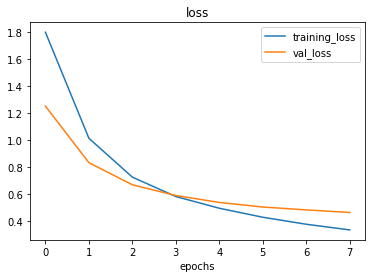

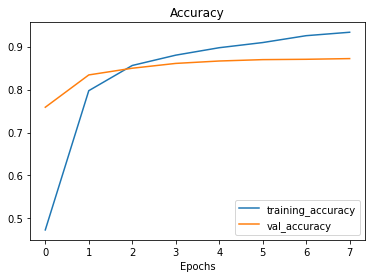

In [ ]:
plot_loss_curvers(effecientnet_history)

In [ ]:
len(efficientnet_model.layers[0].weights)

309

In [ ]:
'''!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetVB0 vs ResNet50V2"\
  --description "Comparing two different TF hub feature extraction model architectures"\
  --one_shot'''

'!tensorboard dev upload --logdir ./tensorflow_hub/   --name "EfficientNetVB0 vs ResNet50V2"  --description "Comparing two different TF hub feature extraction model architectures"  --one_shot'

In [ ]:
'''!tensorboard dev list'''

'!tensorboard dev list'

In [ ]:
'''!tensorboard dev delete --experiment_id GRxNq9PWSOmxGH18Wg8JYg'''

'!tensorboard dev delete --experiment_id GRxNq9PWSOmxGH18Wg8JYg'